# Some images for more substantial talks

In [2]:
import sys
sys.path.append('../Modules')
import numpy as np
import pandas as pd
import galsim

import Image_Fits_Stats
#import Visual_analysis

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
import pywt
from scipy.stats import norm
import math

#Galsim arguments
target_size=64
galaxy_type='real'
psf_type='real'

cat = galsim.COSMOSCatalog(sample='23.5')
#Pixel scale in arcsec (the same for all the galaxies)
_,_,_,pixel_scale,_=cat.getRealParams(0)

## Galsim drawImage

In [3]:
def get_galaxy(index):
    #Making galaxy
    gal=cat.makeGalaxy(index,gal_type=galaxy_type)
    
    #Get the PSF object
    psf = gal.original_psf
    #Perform convolution with PSF to get the original HST image
    gal=galsim.Convolve(gal, psf)
    
    #Get noise
    _,_,_,_,COSMOS_noise_variance=cat.getRealParams(index)
    COSMOS_noise=np.sqrt(COSMOS_noise_variance)
    return gal,COSMOS_noise

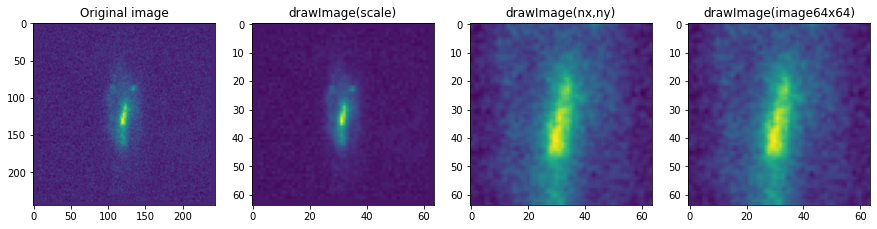

In [23]:
gal,_=get_galaxy(0)

Original_image=gal.drawImage(use_true_center=True, method='auto').array

size=np.min(Original_image.shape)
Scaling_factor=64/size
Galsim_scale=pixel_scale*(size-2)/(target_size-2)
Scaled_image=gal.drawImage(scale=Galsim_scale,use_true_center=True, method='auto').array

Cropped_image=gal.drawImage(nx=64,ny=64,use_true_center=True, method='auto').array

im=galsim.Image(64,64)
Prepared_image=gal.drawImage(image=im,use_true_center=True, method='auto',add_to_image=True).array


f, ax = plt.subplots(1, 4, figsize=(15,10))
ax[0].imshow(Original_image)
ax[0].set_title("Original image")
ax[1].imshow(Scaled_image)
ax[1].set_title("drawImage(scale)")
ax[2].imshow(Cropped_image)
ax[2].set_title("drawImage(nx,ny)")
ax[3].imshow(Prepared_image)
ax[3].set_title("drawImage(image64x64)")
plt.show()